In [1]:
# Recompile This section every time

import os
import codecs
import string
import os
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import pickle
import math
import numpy as np
from nltk.tree import *
from nltk.stem import WordNetLemmatizer 
import random
import numpy as num
from math import exp
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Find all file path and read them

def read(file):
	fp = codecs.open(file,"r",encoding='utf-8', errors='ignore')
	text = fp.read()
	return text

files = []
token = RegexpTokenizer('\s+|\-+|\.+|\@+|\t+|\n+|[0-9]+|\"+|\>+|\,+|\?+|\:+|\{+|\(+|\[+|\)+|\}+|\]+|\<+|\_+|\!+|\/+|\|+|\\+|\*+|\=+|\^+|\$+|\&+|\#+|\*+|\++', gaps = True)
lem = WordNetLemmatizer() 
path='C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/'
for r, d, f in os.walk(path):
	for file in f:
		files.append(os.path.join(r, file))
files.sort()
doc=[]
size=len(files)
count=0
for i in tqdm(range(0,size)):
    text=read(files[i])
    m=token.tokenize(text)
    doc.append(m)
    count+=1
print("#Docs are ",count)

100%|██████████| 5000/5000 [00:15<00:00, 330.60it/s]


#Docs are  5000


In [3]:
# Extracting all valid words
word_list={} # Words collection
count=-1

cosine_index=[] # Document index file

for i in tqdm(range(0,size)):
    count+=1
    index=0
    cosine_index.append({})
    cosine_index[count]['Unique']=0.0
    cosine_index[count]['Total']=0.0
    files[i]=[files[i],len(doc[i])]
    for tk in doc[i]:
        k=tk.lower()
        k=lem.lemmatize(k)
        #k=tk
        
        if not k.lower() in cosine_index[count].keys():
            cosine_index[count][k.lower()]=1.0
            cosine_index[count]['Unique']+=1.0
            cosine_index[count]['Total']+=1.0
        else:
            cosine_index[count][k.lower()]+=1.0
            cosine_index[count]['Total']+=1.0
        
        if not k.lower()  in word_list.keys():
            
            word_list[k.lower()]=[]
            word_list[k.lower()].append(1)
            word_list[k.lower()].append([])
            word_list[k.lower()][1].append([count,1])
            
        else:
            if count != word_list[k.lower()][1][len(word_list[k.lower()][1])-1][0]:
                
                word_list[k.lower()][0]+=1
                word_list[k.lower()][1].append([count,1])
            else:
                word_list[k.lower()][1][word_list[k.lower()][0]-1][1]+=1.0
    
print('#Words are ',len(word_list))  

100%|██████████| 5000/5000 [00:34<00:00, 144.68it/s]


#Words are  49156


In [4]:
# Storing index table into pickle file

word_list['File_info']=[]
word_list['File_info'].append(len(files))
word_list['File_info'].append(files)
word_list['Cosine_sim']=cosine_index
print("Index table is created")
#index = open('IndexTable_Q1', 'ab')
#pickle.dump(word_list, index)                
#index.close()
print("Index table is stored")

Index table is created
Index table is stored


In [5]:
# Defination of some useful fucntions
# Start From here

def count_cosine(querylist,wordlist,check=1,list1=[]):
    length=wordlist['File_info'][0]
    cosine=wordlist['Cosine_sim']
    if check==1:
        for ind in range(0,length):
            sum=0.0
            for k in cosine[ind].keys():
                if k!='Unique' and k!='Total':
                    tf=Tf_cal(cosine[ind][k],cosine[ind]['Total'])
                    idf=Idf_cal(wordlist[k][0],wordlist['File_info'][0])
                    sum+=(tf*idf)*(tf*idf)
            sum=math.sqrt(sum)
            list1.append(sum)
    sum1=0.0
    for k in querylist.keys():
        if k!='Unique' and k!='Total' and k in wordlist.keys():
            if 'Total' in querylist.keys():
                tf=Tf_cal(querylist[k],querylist['Total'])
                idf=Idf_cal(wordlist[k][0],wordlist['File_info'][0])
                sum1+=(tf*idf)*(tf*idf)
            else:
                sum1+=querylist[k]*querylist[k]
    sum1=math.sqrt(sum1)
    if check==1:
        list1.append(sum1)
    else:
        list1[length]=sum1
    return list1

def SortTuple(turple):   # Sorting Operation
    turple.sort(key = lambda x: x[0], reverse=True)  
    return turple 

def Tf_cal(freq,length):  # Tf calculation
    
    res=0                   ######################################### 1) 
    if freq>0:
        res=1
        
    res=freq               ######################################### 2) 
    
    res=freq/length        ######################################### 3) 
    
    return res 



def Idf_cal(freq,Doc):  # Idf Calculation
    
    res=1+math.log10(Doc/(freq))    ######################################### 1) 
    
    res=math.log10(Doc/(freq))      ######################################### 2) 
    
    res=1+math.log10(Doc/(freq+1))  ######################################### 3) 
    
    return res

def cosine_similarity(querylist,topk,wordlist,list1):  # Cosine Similarity
    doc=[]
    cosine=wordlist['Cosine_sim']
    length=len(wordlist['Cosine_sim'])
    for ind in range(0,length):
        sum=0.0
        for i in querylist.keys():
            if i in cosine[ind].keys() and i!='Unique' and i!='Total':
                idf=Idf_cal(wordlist[i][0],wordlist['File_info'][0])
                tf1=Tf_cal(cosine[ind][i],cosine[ind]['Total'])
                if 'Total' in querylist.keys():
                    tf=Tf_cal(querylist[i],querylist['Total'])
                    sum+=(tf*idf)*(tf1*idf)
                else:
                    sum+=(tf1*idf)*querylist[i]
                    
        if sum>0:
            sum=sum/(list1[ind]*list1[length])
        else:
            sum=0
        turple=(sum,)
        turple+=(ind,)
        doc.append(turple)
    SortTuple(doc)
    return doc[:topk]

In [6]:
# TSNE Graph
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt 
import numpy as np
              
def TSNE_Curve(itera,qvector,wordlist,no_iter):
    tsne = TSNE(n_components=2, random_state=0)
    
    doc=wordlist['Cosine_sim']
    qr=[]
    for each in itera[no_iter-1][0]:
        a=[]
        for k in wordlist.keys():
            if k !='File_info' or k!='Cosine_sim':
                if k in doc[each].keys():
                    a.append(1)
                else:
                    a.append(0)
        qr.append(a)
    
    nqr=[]
    for each in itera[no_iter-1][1]:
        a=[]
        for k in wordlist.keys():
            if k !='File_info' or k!='Cosine_sim':
                if k in doc[each].keys():
                    a.append(1)
                else:
                    a.append(0)
        nqr.append(a)
    
    ql=[]
    for each in range(no_iter):
        a=[]
        for k in wordlist.keys():
            if k !='File_info' or k!='Cosine_sim':
                if k in qvector[each].keys():
                    a.append(1)
                else:
                    a.append(0)
        ql.append(a)
    

    for i in range(no_iter):
        featurevector = []
        label = []
        for j in range(len(itera[i][0])):
            featurevector.append(qr[j])
            label.append(0)
        for j in range(len(itera[i][1])):
            featurevector.append(nqr[j])
            label.append(1)

        featurevector.append(ql[i])
        label.append(2)

        transformed_data = tsne.fit_transform(np.array(featurevector))
        X = np.array(transformed_data)
        Y = ("Relevant", "Non Relevant", "Query Vector")
        plt.scatter(X[:, 0], X[:, 1], c=label, s=100, alpha=0.9, label="Violet-R Aqua-NonR Yellow-Query")
        plt.title("Vector Changes in Rocchio Algorithm")
        plt.legend()
        plt.grid(True)
        plt.show()


# Reading pickle file and taking query from user


dbfile = open('IndexTable_Q1', 'rb')      
wordlist = pickle.load(dbfile) 
dbfile.close()
Map=[]


In [7]:
#### Implementing Rocchio Algorithm

def Rocchio_Algorithm(no_feedback,alpha,beta,gamma,doc2,querylist,top_match,list1,docu,Map):
    
    rel={}
    non_rel={}
    rele=0.0
    nonrel=0
    relevant=[]
    nrelevant=[]
    nrele=0.0

    #alpha=1
    #beta=0.7
    #gamma=0.25

    precision=[]
    recall=[]

    itera=[]
    qvector=[]

    # Feedback Operation Start here
    for i in range(0,no_feedback):
        print("\n\n\t ",i+1,end=") Feedback-")
        index1=input("\t\t\tIndex of relevant doc(space separate)-   ")
        index1=token.tokenize(index1)
        index=[doc2[int(i)-1][1] for i in index1]
        noni=[]
        for k in range(0,top_match):
            if (doc2[k][1] not in index) and (doc2[k][1] not in nrelevant) and (doc2[k][1] not in relevant) :
                noni.append(doc2[k][1])
        for each in index:
            if each not in relevant:
                rele+=1.0
                relevant.append(each)
                for k in cosine[each].keys():
                    if k !='Unique' or k!='Total':
                        if k not in rel.keys():
                            rel[k]=cosine[each][k]
                        else:
                            rel[k]+=cosine[each][k]

        calqnew={}
        for k in rel.keys():
            calqnew[k]=(rel[k]/rele)*beta
        for k in querylist.keys():
            if k !='Unique' or k!='Total':
                if k not in rel.keys():
                        calqnew[k]=querylist[k]*alpha
                else:
                        calqnew[k]+=querylist[k]*alpha

        nr=[]
        for k in range(0,top_match):
            if(doc2[k][1] not in relevant) and (doc2[k][1] not in nrelevant):
                nr.append(doc2[k][1])

        nrelevant.extend(nr)
        itera.append([relevant.copy(),nrelevant.copy()])
        for each in nr:
            nrele+=1.0
            for k in cosine[each].keys():
                if k !='Unique' or k!='Total':
                    if k not in non_rel.keys():
                        non_rel[k]=cosine[each][k]
                    else:
                        non_rel[k]+=cosine[each][k]
        for k in non_rel.keys():
            if k in calqnew.keys():
                if non_rel[k]/nrele<=calqnew[k]:
                    calqnew[k]-=(non_rel[k]/nrele)*gamma
                else:
                    del calqnew[k]
        querylist=calqnew.copy()
        qvector.append(calqnew)
        list1=count_cosine(querylist,wordlist,0,list1)
        doc2=cosine_similarity(querylist,top_match,wordlist,list1)
        docu.append(doc2)
        print()
        cor=0.0
        ma=0.0
        
        
        for i1 in range(0,top_match):
            print("\t",(i1+1),") ",filename[doc2[i1][1]][0],end="  ")
            if doc2[i1][1] in relevant:
                print("\t<- relevant_match")
                #ma+=((i1+1-cor)/(i1+1))
            else:
                if doc2[i1][1] in nrelevant:
                    print("\t<- non-relevant_match")
                    #cor+=1.0
                else:
                    print()
        
        

        # Calculating Precision and Recall
        ncor=0.0  
        pre=[1]
        rec=[0]
        for i1 in range(0,top_match):
            if docu[i][i1][1] in relevant:
                #ma+=((i1+1-cor)/(i1+1))
                ncor+=1.0
                ma+=ncor/(i1+1)
            else:
                if docu[i][i1][1] in nrelevant:
                    cor+=1.0
            pre.append(ncor/(i1+1))
            rec.append(ncor/no_relevant_doc)

        precision.append((top_match-cor)/top_match)
        recall.append((ncor)/no_relevant_doc)
        if int(ncor)!=0:
            ma=ma/ncor
        plt.plot(rec,pre)  
        plt.ylabel('Precision ->') 
        plt.xlabel('Recall ->')
        plt.title('PR Curve')
        plt.show()

        Map[i]+=(ma)
        #print(rele," ",nrele," ",cor," ",top_match)
    
    # Call TSNE function
    TSNE_Curve(itera,qvector,wordlist,no_feedback)
    return Map


Number of query will be given 3
How many feedback will be given?    4


1 ) query->


Enter the query-   Pretty good opinions on biochemistry machines
How many document should be retrieved?    100




Cosine similarity result:  top  100  documents are-

	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59301
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59060
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38523
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59393
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38774
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/rec.sport.hockey\54102
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38837
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58801
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38554
	 10 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034

No of valid ground truth?    1000




	  1) Feedback-

			Index of relevant doc(space separate)-    1 2 4 8 12 23 25 27 36 37



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59488  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59632  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59060  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59301  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59189  
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59546  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59637  	<- non-relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59518  
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59234  
	 10 )  C:/Users/Dibyen

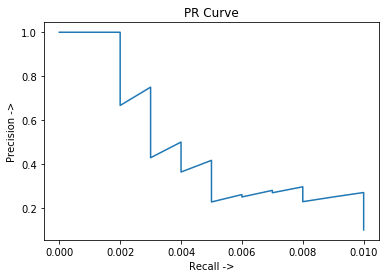



	  2) Feedback-

			Index of relevant doc(space separate)-    5 8 9 11 12 13 14 16 17 18



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59488  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59183  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59165  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59189  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59518  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59234  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59632  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58838  	<- relevant_match
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med

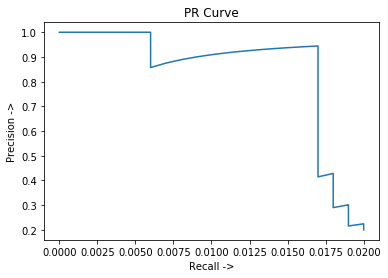



	  3) Feedback-

			Index of relevant doc(space separate)-    16 23 48 72 83 85 93



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59183  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59488  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59165  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59518  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59189  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59234  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59632  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59261  	<- relevant_match
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med

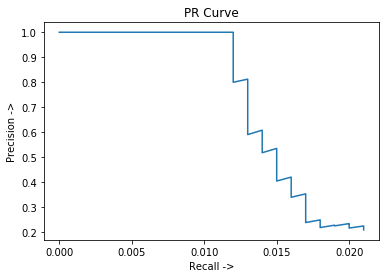



	  4) Feedback-

			Index of relevant doc(space separate)-    58 86 94 96



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59183  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59488  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59165  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59518  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59234  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59189  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59261  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58910  	<- relevant_match
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med

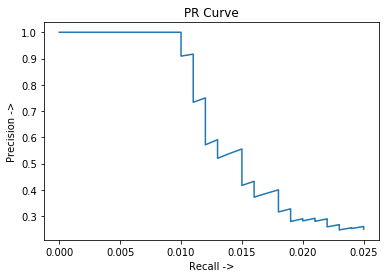

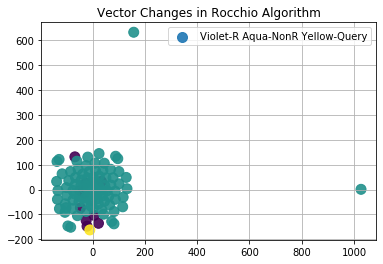

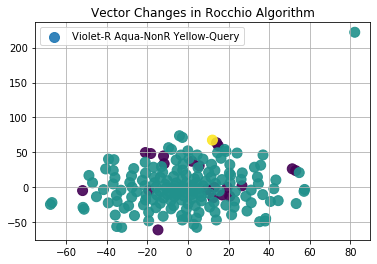

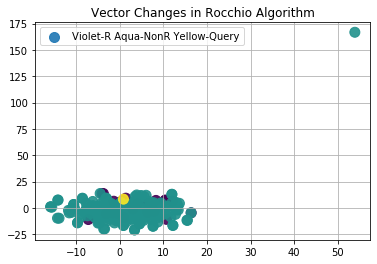

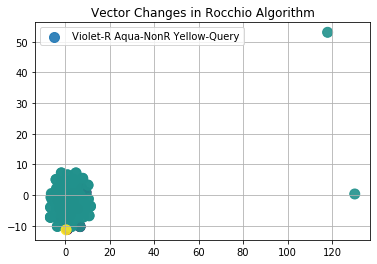

2 ) query->


Enter the query-   Scientific tools for preserving rights and body
How many document should be retrieved?    100




Cosine similarity result:  top  100  documents are-

	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\61335
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59434
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38375
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38852
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58569
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\61307
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59137
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\59913
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\61357
	 10 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroup

No of valid ground truth?    1000




	  1) Feedback-

			Index of relevant doc(space separate)-    10 21 22 25 27 34 39 50 53 54 60 



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176873  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176929  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176874  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176875  
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178913  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178304  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58044  
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\60152  
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/2

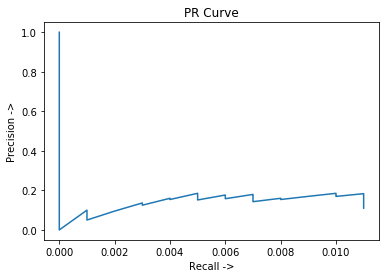



	  2) Feedback-

			Index of relevant doc(space separate)-    10 16 18 19 20 21 22 23 24 25



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176873  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176929  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176874  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178913  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176875  	<- non-relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178304  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58044  	<- non-relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\60152  	<- non-relevant_match
	

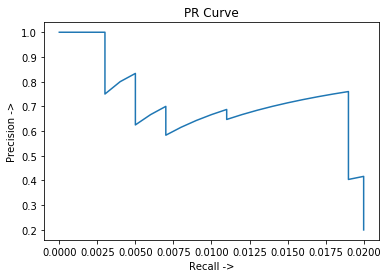



	  3) Feedback-

			Index of relevant doc(space separate)-    77 88 95 96



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176873  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176929  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176874  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178913  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176875  	<- non-relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178304  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58044  	<- non-relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\60152  	<- non-relevant_match
	

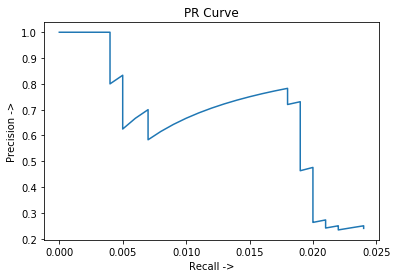



	  4) Feedback-

			Index of relevant doc(space separate)-    56 62 70 75 80 86 88 96 97



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176873  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176929  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176874  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\176875  	<- non-relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178304  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178913  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\179041  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58044  	<- non-relevant_m

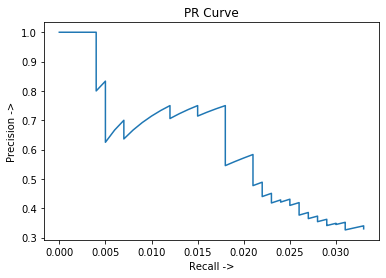

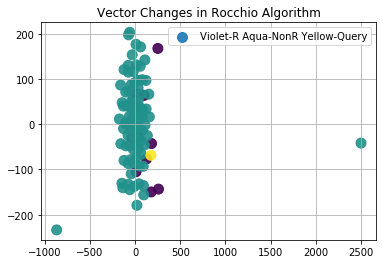

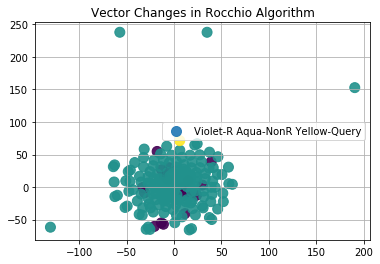

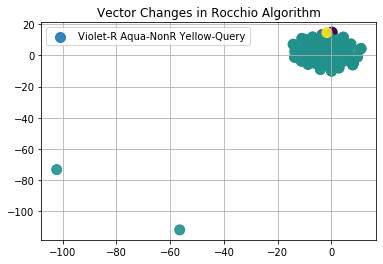

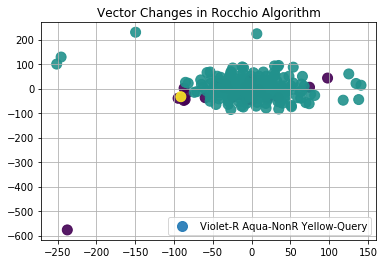

3 ) query->


Enter the query-   Frequently asked questions on State-of-the-art visualisation tools
How many document should be retrieved?    100




Cosine similarity result:  top  100  documents are-

	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\62126
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178450
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\61335
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59434
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.space\61371
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/comp.graphics\38636
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/talk.politics.misc\178422
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58569
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\58957
	 10 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19

No of valid ground truth?    1000




	  1) Feedback-

			Index of relevant doc(space separate)-    4 8 9 17 31 39 75 84 87 95



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59123  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59286  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59122  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59285  
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59284  
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59283  
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59347  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59126  
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59125  
	 10 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19

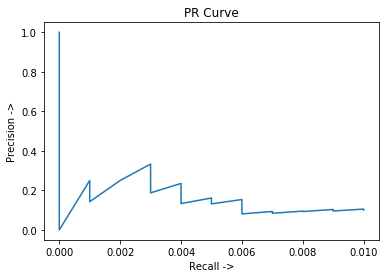



	  2) Feedback-

			Index of relevant doc(space separate)-    1 2 3 4 5 6 7 8 9 10 11



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59286  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59123  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59122  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59285  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59283  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59284  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59125  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59126  	<- relevant_match
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med

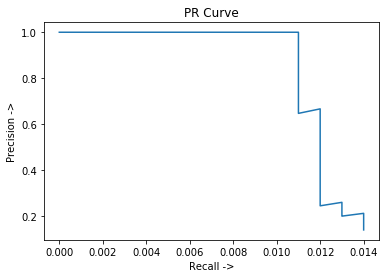



	  3) Feedback-

			Index of relevant doc(space separate)-    48 58 66 79



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59286  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59123  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59122  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59284  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59283  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59285  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59125  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59126  	<- relevant_match
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med

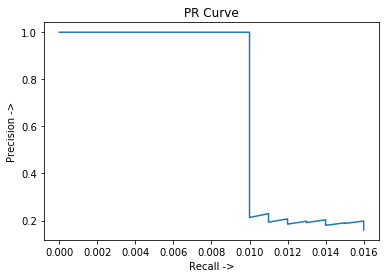



	  4) Feedback-

			Index of relevant doc(space separate)-    93



	 1 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59286  	<- relevant_match
	 2 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59123  	<- relevant_match
	 3 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59122  	<- relevant_match
	 4 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59284  	<- relevant_match
	 5 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59283  	<- relevant_match
	 6 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59285  	<- relevant_match
	 7 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59125  	<- relevant_match
	 8 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med\59126  	<- relevant_match
	 9 )  C:/Users/Dibyendu/Desktop/Information Retrieval/A4_MT19034/20_newsgroups/sci.med

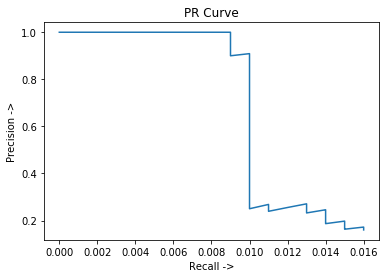

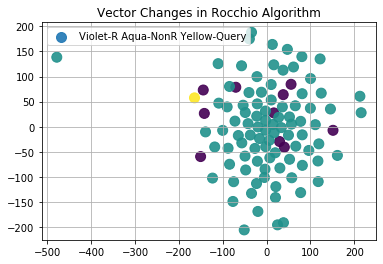

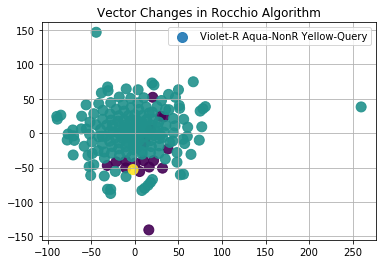

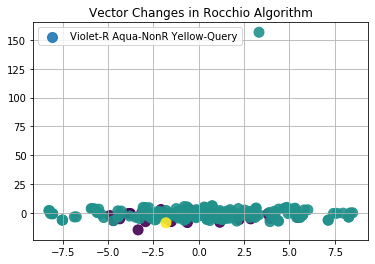

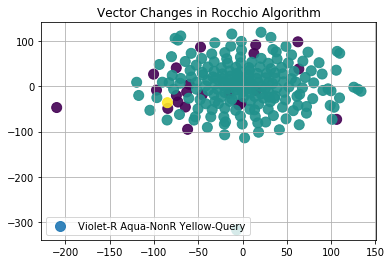

In [5]:
# Reading input from user

cosine=wordlist['Cosine_sim']
filename=wordlist['File_info'][1]
no_q=int(input("Number of query will be given"))
no_feedback=int(input("How many feedback will be given?   "))
for i in range(no_feedback):
    Map.append(0.0)
for no in range(no_q):
    print(no+1,") query->",)
    Query=input("Enter the query-  ")
    Query=Query.strip().lower()
    Query=Query.replace(',','')
    token = RegexpTokenizer('\s+|\-+|\.+|\@+|\t+|\n+|\"+|\>+|\,+|\?+|\:+|\{+|\(+|\[+|\)+|\}+|\]+|\<+|\_+|\!+|\/+|\|+|\\+|\*+|\=+|\^+|\$+|\&+|\#+|\*+|\++', gaps = True)
    lem = WordNetLemmatizer()
    query_match=token.tokenize(Query)
    query=[]
    for i in query_match:
        k=lem.lemmatize(i.lower())
        query.append(k)
    querylist={}
    querylist['Unique']=0.0
    querylist['Total']=0.0
    for i in query:
        if i not in querylist.keys():
            querylist[i]=1.0
            querylist['Unique']+=1.0
            querylist['Total']+=1.0
        else:
            querylist[i]+=1.0
            querylist['Total']+=1.0
    list1=count_cosine(querylist,wordlist)
    top_match=int(input("How many document should be retrieved?   "))
    doc2=cosine_similarity(querylist,top_match,wordlist,list1)
    docu=[]
    docu.append(doc2)
    print()
    print()
    print('Cosine similarity result:  top ',top_match," documents are-")
    print()

    for i in range(0,top_match):
        print("\t",(i+1),") ",filename[doc2[i][1]][0])
    
    no_relevant_doc=int(input("No of valid ground truth?   "))
    
    Map=Rocchio_Algorithm(no_feedback,1,0.75,0.25,doc2,querylist,top_match,list1,docu,Map)  # Calling Rocchio Algorithm

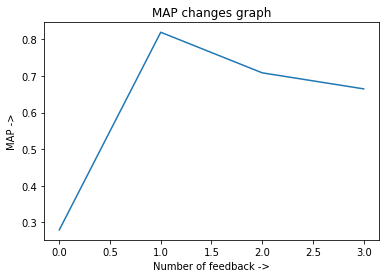

In [7]:
#Map Curve Plot
x=[]
for i in range(no_feedback):
    x.append(Map[i]/no_q)
plt.plot(range(len(x)),x)  
plt.ylabel('MAP ->') 
plt.xlabel('Number of feedback ->')
plt.title('MAP changes graph') 
plt.show()